Given a binary tree root and a linked list with head as the first node. 

Return True if all the elements in the linked list starting from the head correspond to some downward path connected in the binary tree otherwise return False.

In this context downward path means a path that starts at some node and goes downwards.

 

Example 1:

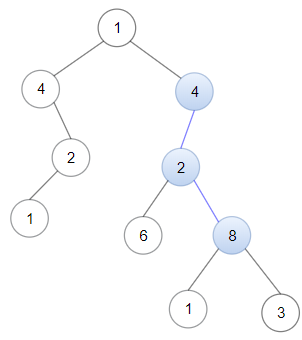

Input: head = [4,2,8], root = [1,4,4,null,2,2,null,1,null,6,8,null,null,null,null,1,3]
Output: true
Explanation: Nodes in blue form a subpath in the binary Tree.  

Example 2:

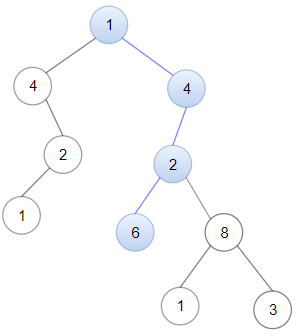

Input: head = [1,4,2,6], root = [1,4,4,null,2,2,null,1,null,6,8,null,null,null,null,1,3]
Output: true

Example 3:

Input: head = [1,4,2,6,8], root = [1,4,4,null,2,2,null,1,null,6,8,null,null,null,null,1,3]
Output: false
Explanation: There is no path in the binary tree that contains all the elements of the linked list from head.

 

Constraints:

    The number of nodes in the tree will be in the range [1, 2500].
    The number of nodes in the list will be in the range [1, 100].
    1 <= Node.val <= 100 for each node in the linked list and binary tree.



In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSubPath(self, head: Optional[ListNode], root: Optional[TreeNode]) -> bool:
        if not head:
            return True
        if not root:
            return False
        
        def dfs(node):
            if not node:
                return False
            if node.val == head.val:
                res = find_list(node, head)
                if res:
                    return True
            return dfs(node.left) or dfs(node.right)
        
        def find_list(node, lst):
            if lst.val == node.val:
                if lst.next is None:
                    return True
                ans = []
                if node.left:
                    ans.append(find_list(node.left, lst.next))
                if node.right:
                    ans.append(find_list(node.right, lst.next))
                if not ans:
                    return False
                return max(ans)
            else:
                return False
        return dfs(root)